In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from trajectory import *
from tqdm import trange

In [71]:
usa_airports = [
    # Large airports
    {'name': 'Los Angeles International Airport', 'abbreviation': 'LAX', 'coordinates': (34.052235, -118.243683)},
    # {'name': 'Hartsfield-Jackson Atlanta International Airport', 'abbreviation': 'ATL', 'coordinates': (33.6407, -84.4277)},
    {'name': 'John F. Kennedy International Airport', 'abbreviation': 'JFK', 'coordinates': (40.6413, -73.7781)},
    {'name': 'Hartsfield-Jackson Atlanta International Airport', 'abbreviation': 'ATL', 'coordinates': (33.6407, -84.4277)},
    
    # Smaller airports
    # {'name': 'Denver International Airport', 'abbreviation': 'DEN', 'coordinates': (39.8561, -104.6737)},
    # {'name': 'Dallas Love Field', 'abbreviation': 'DAL', 'coordinates': (32.8470, -96.8517)},
    {'name': 'Rocky Mountain Metropolitan Airport', 'abbreviation': 'BJC', 'coordinates': (39.9097, -105.1174)},
    {'name': 'Seattle-Tacoma International Airport', 'abbreviation': 'SEA', 'coordinates': (47.4502, -122.3088)},
    {'name': 'Tampa International Airport', 'abbreviation': 'TPA', 'coordinates': (27.9755, -82.5333)}

    
    # Additional smaller airports
    # {'name': 'San Diego International Airport', 'abbreviation': 'SAN', 'coordinates': (32.7336, -117.1897)},
    # {'name': 'Orlando International Airport', 'abbreviation': 'MCO', 'coordinates': (28.4294, -81.3089)},
    # {'name': 'LaGuardia Airport', 'abbreviation': 'LGA', 'coordinates': (40.7769, -73.8740)}
]

print(usa_airports)


# Get abbreviations
abbrevs = [airport['abbreviation'] for airport in usa_airports]
X = [airport['coordinates'][1] for airport in usa_airports]
Y = [airport['coordinates'][0] for airport in usa_airports]

[{'name': 'Los Angeles International Airport', 'abbreviation': 'LAX', 'coordinates': (34.052235, -118.243683)}, {'name': 'John F. Kennedy International Airport', 'abbreviation': 'JFK', 'coordinates': (40.6413, -73.7781)}, {'name': 'Hartsfield-Jackson Atlanta International Airport', 'abbreviation': 'ATL', 'coordinates': (33.6407, -84.4277)}, {'name': 'Rocky Mountain Metropolitan Airport', 'abbreviation': 'BJC', 'coordinates': (39.9097, -105.1174)}, {'name': 'Seattle-Tacoma International Airport', 'abbreviation': 'SEA', 'coordinates': (47.4502, -122.3088)}, {'name': 'Tampa International Airport', 'abbreviation': 'TPA', 'coordinates': (27.9755, -82.5333)}]


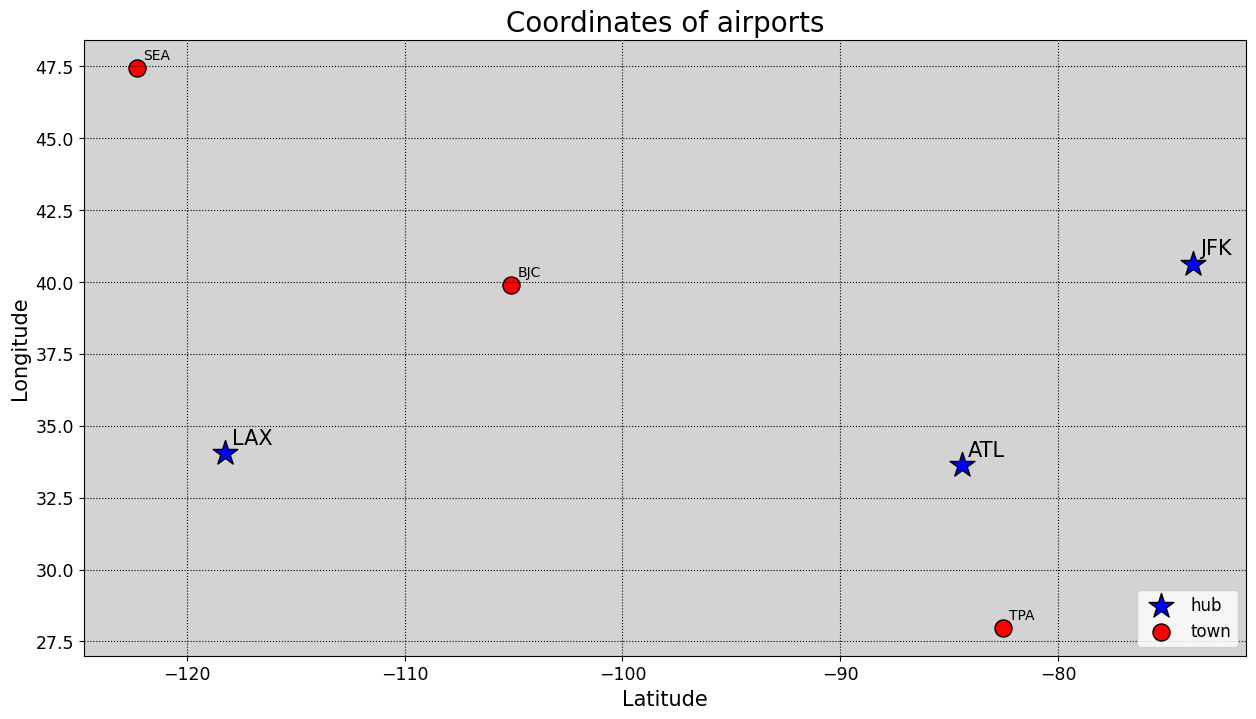

In [72]:
hubs = ['LAX', 'ATL', 'JFK']
colors = ['blue' if city in hubs else 'red' for city in abbrevs]
markers = ['*' if city in hubs else 'o' for city in abbrevs]
sizes = [350 if city in hubs else 150 for city in abbrevs]
# sizes = [350 for city in abbrevs]
text_sizes = [15 if city in hubs else 10 for city in abbrevs]
# text_sizes = [15 for city in cities]
labels = ['hub' if city in hubs else 'town' for city in abbrevs]
# labels = ['town' for city in cities]

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
# Create the scatter plot with a custom legend
legend_handles = []  # Collect legend handles
legend_labels = []   # Collect legend labels

for i in range(len(abbrevs)):
    if labels[i] not in legend_labels:
        legend_handles.append(axes.scatter([], [], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i]))
        legend_labels.append(labels[i])  # Add marker label to legend labels list
    axes.scatter(X[i], Y[i], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i])
# axes[1].scatter(X, Y, color=colors, edgecolors='black', marker=markers, s=150)
axes.set_title("Coordinates of airports", fontsize=20)
axes.tick_params(axis='both', labelsize=12.5)
axes.set_facecolor('LightGrey')
include_river = False
if include_river:
    axes.axhline(40, xmin=0, xmax=0.55, linewidth=15, color='aqua')
    axes.axvline(40, ymin=0, ymax=0.45, linewidth=15, color='aqua')
    axes.axhline(40, xmin=0.5, xmax=0.62, linewidth=15, color='aqua')
    axes.axvline(50, ymin=0.455, ymax=0.63, linewidth=15, color='aqua')
    axes.axhline(60, xmin=0.635, xmax=0.745, linewidth=15, color='aqua')
    axes.axvline(60, ymin=0.66, ymax=1, linewidth=15, color='aqua')
axes.set_xlabel('Latitude', fontsize=15)
axes.set_ylabel('Longitude', fontsize=15)
# Add the legend to the scatter plot
axes.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=12)
# axes[1].set_xlim(0,)
# axes[1].set_ylim(0,)
for i, (x, y) in enumerate(zip(X, Y)):
    axes.text(x+0.30, y+0.30, abbrevs[i], fontsize=text_sizes[i], color='k')
axes.grid(True, color='black', linestyle='dotted')
# plt.tight_layout()
# if not os.path.exists(r"algorithm_repository/Flow-Maps/data_loc_2.pdf"):
#     plt.savefig(r"algorithm_repository/Flow-Maps/data_loc_2.pdf", bbox_inches="tight")
plt.show()

In [73]:
european_airports = [
    # Large European airports
    {'name': 'Heathrow Airport', 'abbreviation': 'LHR', 'coordinates': (51.4700, -0.4543), 'country': 'United Kingdom'},
    # {'name': 'Charles de Gaulle Airport', 'abbreviation': 'CDG', 'coordinates': (49.0097, 2.5479), 'country': 'France'},
    # {'name': 'Frankfurt Airport', 'abbreviation': 'FRA', 'coordinates': (50.0344, 8.5575), 'country': 'Germany'},
    # {'name': 'Amsterdam Airport Schiphol', 'abbreviation': 'AMS', 'coordinates': (52.3105, 4.7683), 'country': 'Netherlands'},
    {'name': 'Leonardo da Vinci–Fiumicino Airport', 'abbreviation': 'FCO', 'coordinates': (41.8003, 12.2386), 'country': 'Italy'},
    # {'name': 'Zurich Airport', 'abbreviation': 'ZRH', 'coordinates': (47.4647, 8.5492), 'country': 'Switzerland'},
    {'name': 'Sheremetyevo International Airport', 'abbreviation': 'SVO', 'coordinates': (55.9726, 37.4149), 'country': 'Russia'},
    # {'name': 'Adolfo Suárez Madrid–Barajas Airport', 'abbreviation': 'MAD', 'coordinates': (40.4919, -3.5691), 'country': 'Spain'},
    {'name': 'Amsterdam Airport Schiphol', 'abbreviation': 'AMS', 'coordinates': (52.3105, 4.7683), 'country': 'Netherlands'},
    
    # Small European airports
    # {'name': 'Barcelona–El Prat Airport', 'abbreviation': 'BCN', 'coordinates': (41.2971, 2.0785), 'country': 'Spain'},
    # {'name': 'Dublin Airport', 'abbreviation': 'DUB', 'coordinates': (53.4272, -6.2446), 'country': 'Ireland'},
    # {'name': 'Vienna International Airport', 'abbreviation': 'VIE', 'coordinates': (48.1197, 16.5639), 'country': 'Austria'},
    # {'name': 'Copenhagen Airport', 'abbreviation': 'CPH', 'coordinates': (55.6180, 12.6498), 'country': 'Denmark'},
    {'name': 'Istanbul Airport', 'abbreviation': 'IST', 'coordinates': (41.2756, 28.7519), 'country': 'Turkey'},
    {'name': 'Keflavík International Airport', 'abbreviation': 'KEF', 'coordinates': (63.9816, -22.6056), 'country': 'Iceland'},
    {'name': 'Lisbon Portela Airport', 'abbreviation': 'LIS', 'coordinates': (38.7704, -9.1291), 'country': 'Portugal'}

]

print(european_airports)

# Get abbreviations
abbrevs = [airport['abbreviation'] for airport in european_airports]
X = [airport['coordinates'][1] for airport in european_airports]
Y = [airport['coordinates'][0] for airport in european_airports]

[{'name': 'Heathrow Airport', 'abbreviation': 'LHR', 'coordinates': (51.47, -0.4543), 'country': 'United Kingdom'}, {'name': 'Leonardo da Vinci–Fiumicino Airport', 'abbreviation': 'FCO', 'coordinates': (41.8003, 12.2386), 'country': 'Italy'}, {'name': 'Sheremetyevo International Airport', 'abbreviation': 'SVO', 'coordinates': (55.9726, 37.4149), 'country': 'Russia'}, {'name': 'Amsterdam Airport Schiphol', 'abbreviation': 'AMS', 'coordinates': (52.3105, 4.7683), 'country': 'Netherlands'}, {'name': 'Istanbul Airport', 'abbreviation': 'IST', 'coordinates': (41.2756, 28.7519), 'country': 'Turkey'}, {'name': 'Keflavík International Airport', 'abbreviation': 'KEF', 'coordinates': (63.9816, -22.6056), 'country': 'Iceland'}, {'name': 'Lisbon Portela Airport', 'abbreviation': 'LIS', 'coordinates': (38.7704, -9.1291), 'country': 'Portugal'}]


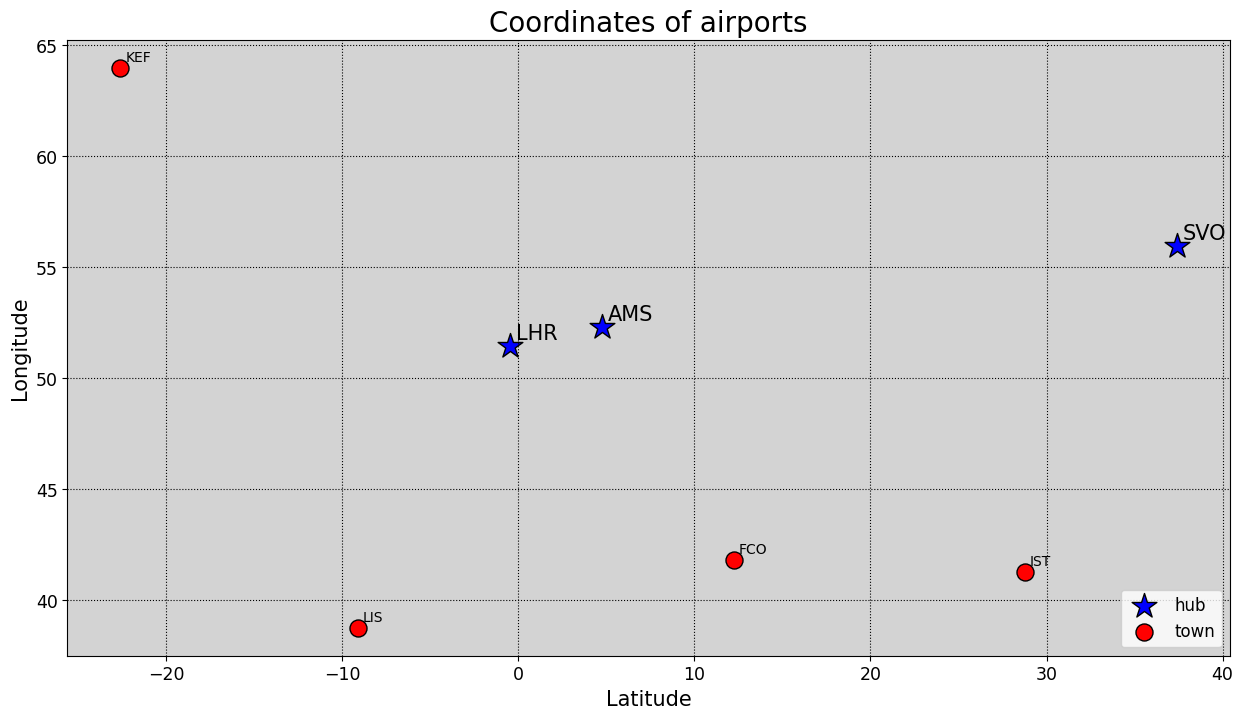

In [74]:
hubs = ['LHR', 'CDG', 'FRA', 'AMS', 'ZRH', 'SVO', 'AMS']
colors = ['blue' if city in hubs else 'red' for city in abbrevs]
markers = ['*' if city in hubs else 'o' for city in abbrevs]
sizes = [350 if city in hubs else 150 for city in abbrevs]
# sizes = [350 for city in abbrevs]
text_sizes = [15 if city in hubs else 10 for city in abbrevs]
# text_sizes = [15 for city in cities]
labels = ['hub' if city in hubs else 'town' for city in abbrevs]
# labels = ['town' for city in cities]

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
# Create the scatter plot with a custom legend
legend_handles = []  # Collect legend handles
legend_labels = []   # Collect legend labels

for i in range(len(abbrevs)):
    if labels[i] not in legend_labels:
        legend_handles.append(axes.scatter([], [], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i]))
        legend_labels.append(labels[i])  # Add marker label to legend labels list
    axes.scatter(X[i], Y[i], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i])
# axes[1].scatter(X, Y, color=colors, edgecolors='black', marker=markers, s=150)
axes.set_title("Coordinates of airports", fontsize=20)
axes.tick_params(axis='both', labelsize=12.5)
axes.set_facecolor('LightGrey')
include_river = False
if include_river:
    axes.axhline(40, xmin=0, xmax=0.55, linewidth=15, color='aqua')
    axes.axvline(40, ymin=0, ymax=0.45, linewidth=15, color='aqua')
    axes.axhline(40, xmin=0.5, xmax=0.62, linewidth=15, color='aqua')
    axes.axvline(50, ymin=0.455, ymax=0.63, linewidth=15, color='aqua')
    axes.axhline(60, xmin=0.635, xmax=0.745, linewidth=15, color='aqua')
    axes.axvline(60, ymin=0.66, ymax=1, linewidth=15, color='aqua')
axes.set_xlabel('Latitude', fontsize=15)
axes.set_ylabel('Longitude', fontsize=15)
# Add the legend to the scatter plot
axes.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=12)
# axes[1].set_xlim(0,)
# axes[1].set_ylim(0,)
for i, (x, y) in enumerate(zip(X, Y)):
    axes.text(x+0.30, y+0.30, abbrevs[i], fontsize=text_sizes[i], color='k')
axes.grid(True, color='black', linestyle='dotted')
# plt.tight_layout()
# if not os.path.exists(r"algorithm_repository/Flow-Maps/data_loc_2.pdf"):
#     plt.savefig(r"algorithm_repository/Flow-Maps/data_loc_2.pdf", bbox_inches="tight")
plt.show()

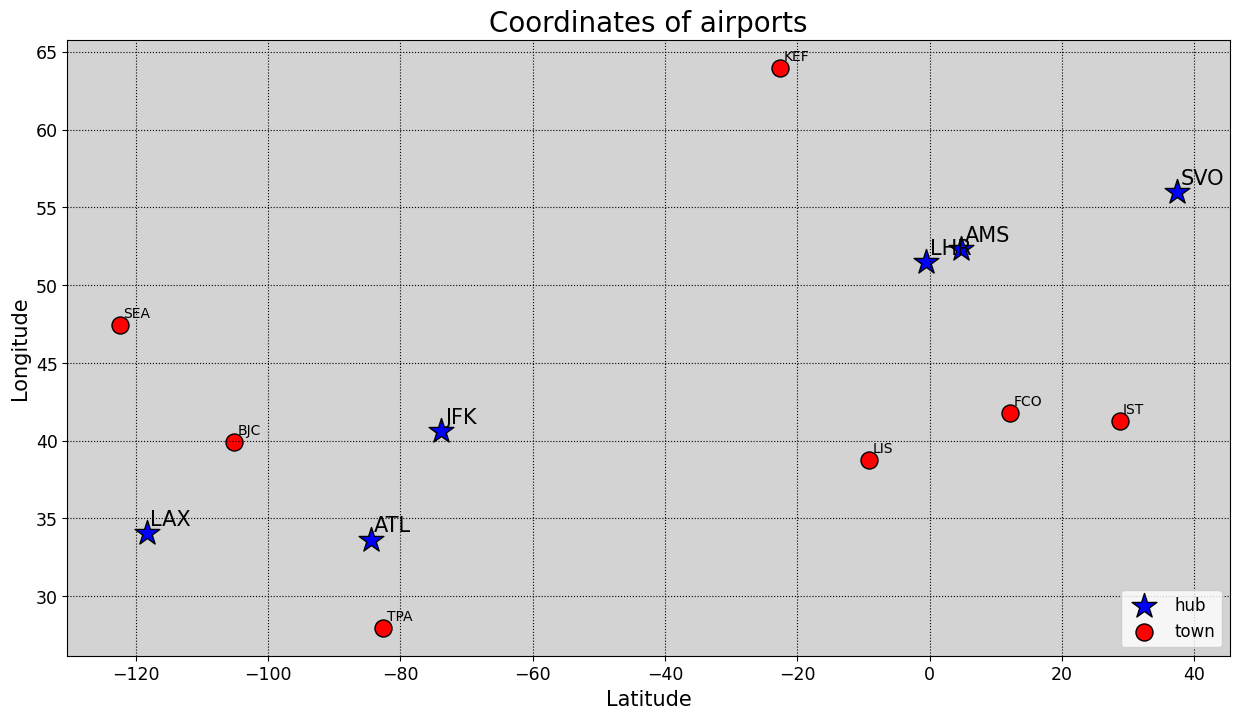

In [75]:
airports = usa_airports + european_airports

# Get abbreviations
abbrevs = [airport['abbreviation'] for airport in airports]
X = [airport['coordinates'][1] for airport in airports]
Y = [airport['coordinates'][0] for airport in airports]

hubs = ['LHR', 'LAX', 'JFK', 'SVO', 'AMS', 'ATL']
# hubs = ['LHR', 'CDG', 'FRA', 'AMS', 'FCO', 'ZRH', 'SVO', 'MAD', 'AMS']

colors = ['blue' if city in hubs else 'red' for city in abbrevs]
markers = ['*' if city in hubs else 'o' for city in abbrevs]
sizes = [350 if city in hubs else 150 for city in abbrevs]
# sizes = [350 for city in abbrevs]
text_sizes = [15 if city in hubs else 10 for city in abbrevs]
# text_sizes = [15 for city in cities]
labels = ['hub' if city in hubs else 'town' for city in abbrevs]
# labels = ['town' for city in cities]

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
# Create the scatter plot with a custom legend
legend_handles = []  # Collect legend handles
legend_labels = []   # Collect legend labels

for i in range(len(abbrevs)):
    if labels[i] not in legend_labels:
        legend_handles.append(axes.scatter([], [], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i]))
        legend_labels.append(labels[i])  # Add marker label to legend labels list
    axes.scatter(X[i], Y[i], color=colors[i], edgecolors='black', marker=markers[i], s=sizes[i])
# axes[1].scatter(X, Y, color=colors, edgecolors='black', marker=markers, s=150)
axes.set_title("Coordinates of airports", fontsize=20)
axes.tick_params(axis='both', labelsize=12.5)
axes.set_facecolor('LightGrey')
include_river = False
if include_river:
    axes.axhline(40, xmin=0, xmax=0.55, linewidth=15, color='aqua')
    axes.axvline(40, ymin=0, ymax=0.45, linewidth=15, color='aqua')
    axes.axhline(40, xmin=0.5, xmax=0.62, linewidth=15, color='aqua')
    axes.axvline(50, ymin=0.455, ymax=0.63, linewidth=15, color='aqua')
    axes.axhline(60, xmin=0.635, xmax=0.745, linewidth=15, color='aqua')
    axes.axvline(60, ymin=0.66, ymax=1, linewidth=15, color='aqua')
axes.set_xlabel('Latitude', fontsize=15)
axes.set_ylabel('Longitude', fontsize=15)
# Add the legend to the scatter plot
axes.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=12)
# axes[1].set_xlim(0,)
# axes[1].set_ylim(0,)
for i, (x, y) in enumerate(zip(X, Y)):
    axes.text(x+0.5, y+0.5, abbrevs[i], fontsize=text_sizes[i], color='k')
axes.grid(True, color='black', linestyle='dotted')
# plt.tight_layout()
# if not os.path.exists(r"algorithm_repository/Flow-Maps/data_loc_2.pdf"):
#     plt.savefig(r"algorithm_repository/Flow-Maps/data_loc_2.pdf", bbox_inches="tight")
plt.show()

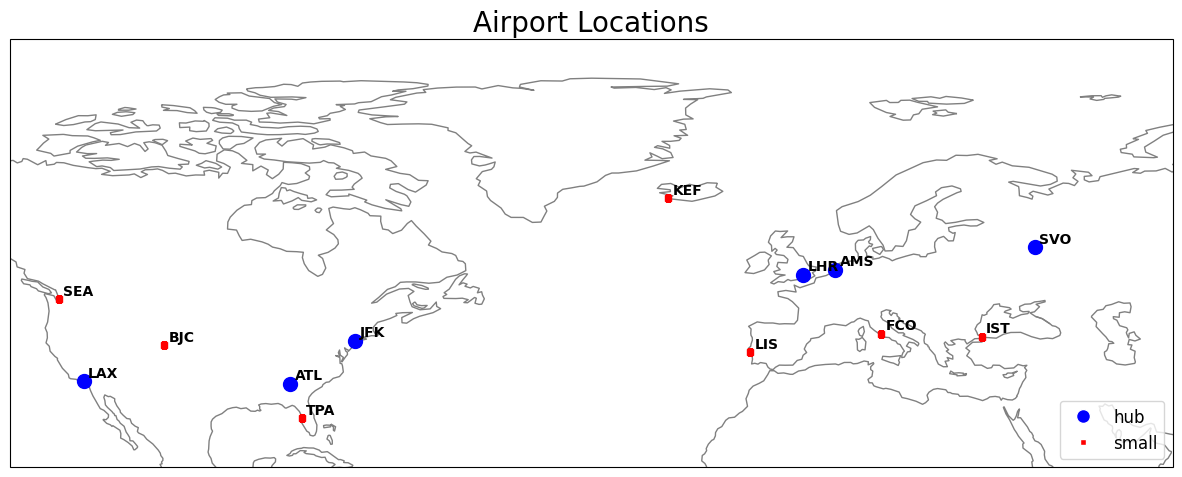

In [88]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(color='grey')

# Plot airports
for airport in airports:
    ax.plot(airport['coordinates'][1], airport['coordinates'][0], 'bo' if airport['abbreviation'] in hubs else 'rs', markersize=10 if airport['abbreviation'] in hubs else 5)

# Add labels for airports
for airport in airports:
    ax.text(airport['coordinates'][1] + 0.75, airport['coordinates'][0] + 0.75, airport['abbreviation'], fontsize=10, fontweight='bold')

# Set y-axis limits
ax.set_ylim(20, 90)
ax.set_xlim(None, 60)

# Define custom legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='blue', label='hub'),
                  Line2D([0], [0], marker='s', color='w', markersize=5, markerfacecolor='red', label='small')]

# Add legend
ax.legend(handles=legend_handles, loc='lower right', fontsize=12)

# Set title
ax.set_title('Airport Locations', fontsize=20)

# Save figure
if not(os.path.exists(r"airports_map_NEW.pdf")):
    plt.savefig(r"airports_map_NEW.pdf", bbox_inches='tight')
# Show plot
plt.show()


In [77]:
# for i in range(len(abbrevs)):
#     print(abbrevs[i], (X[i], Y[i]))

# # Helper function to calculate probability based on distance
# def calculate_probability(src, dest, airports=abbrevs, X=X, Y=Y, west_to_east=True):
#     # If source and destination are the same, return 0
#     if src == dest:
#         return 0.0
    
#     # Distance-based probability calculation
#     src_idx = airports.index(src) 
#     dest_idx = airports.index(dest)

#     # Only West-to-East
#     if west_to_east and (X[dest_idx] < X[src_idx]):
#         return 0.0

#     euclidean_distance = lambda x1, y1, x2, y2: ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
#     distance = euclidean_distance(X[src_idx], Y[src_idx], X[dest_idx], Y[dest_idx])
#     probability = 1 / (1 + distance)
    
#     return probability

# # Probability matrix
# prob_matrix = np.zeros((len(airports), len(airports)))

# # Populate probability matrix
# for i, src_airport in enumerate(abbrevs):
#     for j, dest_airport in enumerate(abbrevs):
#         # Probability for smaller US airports to US hubs
#         if src_airport in ['DEN', 'SEA', 'TPA'] and dest_airport in ['JFK', 'LAX']:
#             prob_matrix[i, j] = 0.8 * calculate_probability(src_airport, dest_airport)
#         # Probability for smaller US airports to smaller US airports
#         elif src_airport in ['DEN', 'SEA', 'TPA'] and dest_airport in ['DEN', 'SEA', 'TPA']:
#             prob_matrix[i, j] = 0.2 * calculate_probability(src_airport, dest_airport)
#         # Probability for US hub to smaller US airports
#         elif dest_airport in ['DEN', 'SEA', 'TPA'] and src_airport in ['JFK', 'LAX']:
#             prob_matrix[i, j] = 0.2 * calculate_probability(src_airport, dest_airport)
#         # Probability for US hub to US hub
#         elif dest_airport in ['JFK', 'LAX'] and src_airport in ['JFK', 'LAX']:
#             prob_matrix[i, j] = 0.8 * calculate_probability(src_airport, dest_airport)
#         # Probability for smaller EU airports to EU hubs
#         elif src_airport in ['LIS', 'KEF', 'IST'] and dest_airport in ['SVO', 'LHR']:
#             prob_matrix[i, j] = 0.55 * calculate_probability(src_airport, dest_airport)
#         # Probability for smaller EU airports to smaller EU airports
#         elif src_airport in ['LIS', 'KEF', 'IST'] and dest_airport in ['LIS', 'KEF', 'IST']:
#             prob_matrix[i, j] = 0.35 * calculate_probability(src_airport, dest_airport)
#         # Probability for EU hubs to smaller EU airports
#         elif dest_airport in ['LIS', 'KEF', 'IST'] and src_airport in ['SVO', 'LHR']:
#             prob_matrix[i, j] = 0.35 * calculate_probability(src_airport, dest_airport)
#         # Probability for EU hubs to EU hubs
#         elif dest_airport in ['SVO', 'LHR'] and src_airport in ['SVO', 'LHR']:
#             prob_matrix[i, j] = 0.65 * calculate_probability(src_airport, dest_airport)
#         # Probability for US hubs to EU hubs
#         elif src_airport in ['JFK', 'LAX'] and dest_airport in ['SVO', 'LHR']:
#             prob_matrix[i, j] = 1.2 * calculate_probability(src_airport, dest_airport)
#         # Probability for US hubs to smaller EU hubs
#         elif src_airport in ['JFK', 'LAX'] and dest_airport in ['LIS', 'KEF', 'IST']:
#             prob_matrix[i, j] = 0.8 * calculate_probability(src_airport, dest_airport)

# # Normalize probabilities
# prob_matrix /= np.sum(prob_matrix, axis=1, keepdims=True)

# print("Probability Matrix:")
# # print(prob_matrix)
# prob_matrix = pd.DataFrame(prob_matrix, index=abbrevs, columns=abbrevs).replace(np.nan, 0)
# prob_matrix.to_excel('city_prob_matrix.xlsx')

In [78]:
airport_hub_dict = {'SEA': 0, 'LAX': 1, 'BJC': 0, 'ATL': 1, 'TPA': 0, 'JFK': 1, 'KEF': 0, 'LIS': 0, 'FCO': 0,
                    'LHR': 1, 'AMS': 1, 'IST': 0, 'SVO': 1}

airport_loc_dict = {'SEA': 0, 'LAX': 0, 'BJC': 0, 'ATL': 0, 'TPA': 0, 'JFK': 0, 'KEF': 1, 'LIS': 1, 'FCO': 1,
                    'LHR': 1, 'AMS': 1, 'IST': 1, 'SVO': 1}

# Some functions to decide whether a trajectory is done
def hub_small_hub(trajectory):
    if len(trajectory) < 3:
        return False
    if len(trajectory) == 3 and (airport_hub_dict[trajectory[0]] == 1) \
        and (airport_hub_dict[trajectory[1]] == 0) and (airport_hub_dict[trajectory[2]] == 1):
        return True
    return False

def hub_hub_small(trajectory):
    if len(trajectory) < 3:
        return False
    if len(trajectory) == 3 and (airport_hub_dict[trajectory[0]] == 1) \
        and (airport_hub_dict[trajectory[1]] == 1) and (airport_hub_dict[trajectory[2]] == 0):
        return True
    return False

def hubs_usa(trajectory, dest):
    if len(trajectory) < 3:
        return False
    if len(trajectory) == 3:
        for city in trajectory:
            if (airport_hub_dict[trajectory[1]] == 1) and (airport_hub_dict[trajectory[2]] == 1) and (dest == "JFK"):
                return True
    return False

def compute_istanbul(trajectory):
    if len(trajectory) < 3:
        return False
    if np.random.uniform(0, 1) > 0.5:
        return True
    return False

def small_hub_hub_small(trajectory):
    if len(trajectory) < 4:
        return False
    small_0_3 = airport_hub_dict[trajectory[0]] + airport_hub_dict[trajectory[3]]
    hub_1_2 = airport_hub_dict[trajectory[1]] + airport_hub_dict[trajectory[2]]
    if (small_0_3 == 0) and (hub_1_2 == 2):
        return True
    return False

def small_hub_hub(trajectory):
    if len(trajectory) != 3:
        return False
    small_0 = airport_hub_dict[trajectory[0]]
    hub_1_2 = airport_hub_dict[trajectory[1]] + airport_hub_dict[trajectory[2]]
    if (small_0 == 0) and (hub_1_2 == 2):
        return True
    return False

def small_hub(trajectory):
    if len(trajectory) != 2:
        return False
    if (airport_hub_dict[trajectory[0]] == 0) and (airport_hub_dict[trajectory[1]] == 1):
        return True
    return False

def hub_small(trajectory):
    if len(trajectory) != 2:
        return False
    if (airport_hub_dict[trajectory[0]] == 1) and (airport_hub_dict[trajectory[1]] == 0):
        return True
    return False

def hub_hub(trajectory):
    if len(trajectory) != 2:
        return False
    if (airport_hub_dict[trajectory[0]] == 1) and (airport_hub_dict[trajectory[1]] == 1):
        return True
    return False

def hub_hub_hub_small(trajectory):
    if len(trajectory) < 4:
        return False
    small_0 = airport_hub_dict[trajectory[0]]
    hub_1_2_3 = airport_hub_dict[trajectory[1]] + airport_hub_dict[trajectory[2]] + airport_hub_dict[trajectory[3]]
    if (small_0 == 0) and (hub_1_2_3 == 3):
        return True
    return False

def transcontinental(trajectory):
    if (airport_loc_dict[trajectory[0]] == 0) and (airport_loc_dict[trajectory[-1]] == 1):
        return True
    return False 

# S H H S
# S H H
# H H S
# S H
# H S
# H H

hub_small(["JFK", 'LIS'])

True

In [79]:
# # Load adapted probability matrix
# prob_matrix = pd.read_excel(r'trajectory_probs.xlsx', index_col=0)

# # Normalize
# prob_matrix_np = prob_matrix.to_numpy()
# prob_matrix_np /= np.sum(prob_matrix_np, axis=1, keepdims=True)

# # Convert back to DF
# prob_matrix = pd.DataFrame(prob_matrix_np, index=prob_matrix.index.values, columns=prob_matrix.columns.values)

# # Generate transitions
# transitions = []

# starting_points = {'LAX': 0.25, 'JFK': 0.25, 'BJC': 0.50/3, 'SEA': 0.50/3, 'TPA': 0.50/3}
# starting_points, starting_points_probs = getDictKeys(starting_points), getDictValues(starting_points)

# np.random.seed(123)
# trajectories = []
# trajectories_str = []
# for i in trange(1000000):
#     trajectory = []
#     src = np.random.choice(starting_points, p=starting_points_probs)
#     trajectory.append(src)
#     dests, probs = prob_matrix.columns.values, prob_matrix.loc[src, :].values
#     dest = np.random.choice(dests, p=probs)
#     trajectory.append(dest)
#     src = dest
#     for _ in range(2):
#         dests, probs = prob_matrix.columns.values, prob_matrix.loc[src, :].values
#         dest = np.random.choice(dests, p=probs)
#         if dest == "IST" and not(compute_istanbul(trajectory)):
#             break
#         elif dest == "NA":
#             break
#         elif hubs_usa(trajectory, dest):
#             break
#         trajectory.append(dest)
#         if dest == 'SVO':
#             break
#         elif hub_hub_small(trajectory) or hub_small_hub(trajectory):
#             break
#         src = dest
#     trajectories.append(trajectory)
#     trajectories_str.append(" ".join(trajectory))

# trajectories_new = []
# trajectories_str_new = []
# for i, (trajectory, trajectory_str) in enumerate(zip(trajectories, trajectories_str)):
#     if small_hub_hub_small(trajectory) or (small_hub_hub(trajectory)) or (hub_hub_small(trajectory)) \
#         or (small_hub(trajectory)) or (hub_small(trajectory)) or (hub_hub(trajectory)) \
#             or hub_hub_hub_small(trajectory) or (trajectory[-1] in ["IST", "SVO"]):
#         if transcontinental(trajectory):
#             trajectories_new.append(trajectory)
#             trajectories_str_new.append(trajectory_str)
#     else:
#         if transcontinental(trajectory):
#             if "LIS" in trajectory:
#                 print(trajectory, [airport_hub_dict[airport] for airport in trajectory], small_hub_hub(trajectory))
#             # if i%5000 == 0:
#             #     print(trajectory)

# print(f"FINAL NUMBER OF TRAJECTORIES: {len(trajectories_new)}")

# # Open the file in write mode
# file_path = r"airport_trajectories_NEW.txt"
# with open(file_path, 'w') as file:
#     # Iterate over the list of strings
#     for string in trajectories_str_new:
#         # Write each string followed by a newline character to the file
#         file.write(string + '\n')

# # Only Transatlantic
# # Not H S H

In [80]:
# len(trajectories_new)

In [81]:
coords = {abbrevs[i]: (X[i], Y[i]) for i in range(len(abbrevs))}
write_to_json(coords, r"airport_coords.json")

In [82]:
t = Trajectory(r"airport_trajectories_NEW.txt")
edges = t.constructWeightMatrix(None, True)
display(edges)

,AMS,ATL,BJC,FCO,IST,JFK,KEF,LAX,LHR,LIS,SEA,SVO,TPA
AMS,0.0,0.0,0.0,119097.0,44075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATL,22535.0,0.0,0.0,0.0,0.0,50102.0,0.0,0.0,21860.0,0.0,0.0,0.0,0.0
BJC,0.0,66628.0,0.0,0.0,0.0,67112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FCO,0.0,0.0,0.0,0.0,935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1811.0,0.0
JFK,254149.0,0.0,0.0,14058.0,7737.0,0.0,10781.0,0.0,227541.0,11982.0,0.0,0.0,0.0
KEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2604.0,0.0
LAX,36525.0,14706.0,0.0,0.0,0.0,58782.0,0.0,0.0,30673.0,0.0,0.0,0.0,0.0
LHR,49439.0,0.0,0.0,79140.0,27458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LIS,0.0,0.0,0.0,13.0,589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
len(t)

637841

In [84]:
# Assuming edges is your DataFrame
# desired_order = ['SEA', 'LAX', 'DEN', 'TPA', 'JFK', 'KEF', 'LIS', 'LHR', 'IST', 'SVO']
desired_order = ['SEA', 'LAX', 'BJC', 'ATL', 'TPA', 'JFK', 'KEF', 'LIS', 'FCO', 'LHR', 'AMS', 'IST', 'SVO']
print(len(desired_order))

# Reorder both index and columns
edges = edges.reindex(index=desired_order, columns=desired_order)

display(edges)

13


,SEA,LAX,BJC,ATL,TPA,JFK,KEF,LIS,FCO,LHR,AMS,IST,SVO
SEA,0.0,68273.0,0.0,13163.0,0.0,27049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LAX,0.0,0.0,0.0,14706.0,0.0,58782.0,0.0,0.0,0.0,30673.0,36525.0,0.0,0.0
BJC,0.0,0.0,0.0,66628.0,0.0,67112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATL,0.0,0.0,0.0,0.0,0.0,50102.0,0.0,0.0,0.0,21860.0,22535.0,0.0,0.0
TPA,0.0,0.0,0.0,0.0,0.0,134849.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JFK,0.0,0.0,0.0,0.0,0.0,0.0,10781.0,11982.0,14058.0,227541.0,254149.0,7737.0,0.0
KEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2604.0
LIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,589.0,0.0
FCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,935.0,0.0
LHR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79140.0,0.0,49439.0,27458.0,0.0


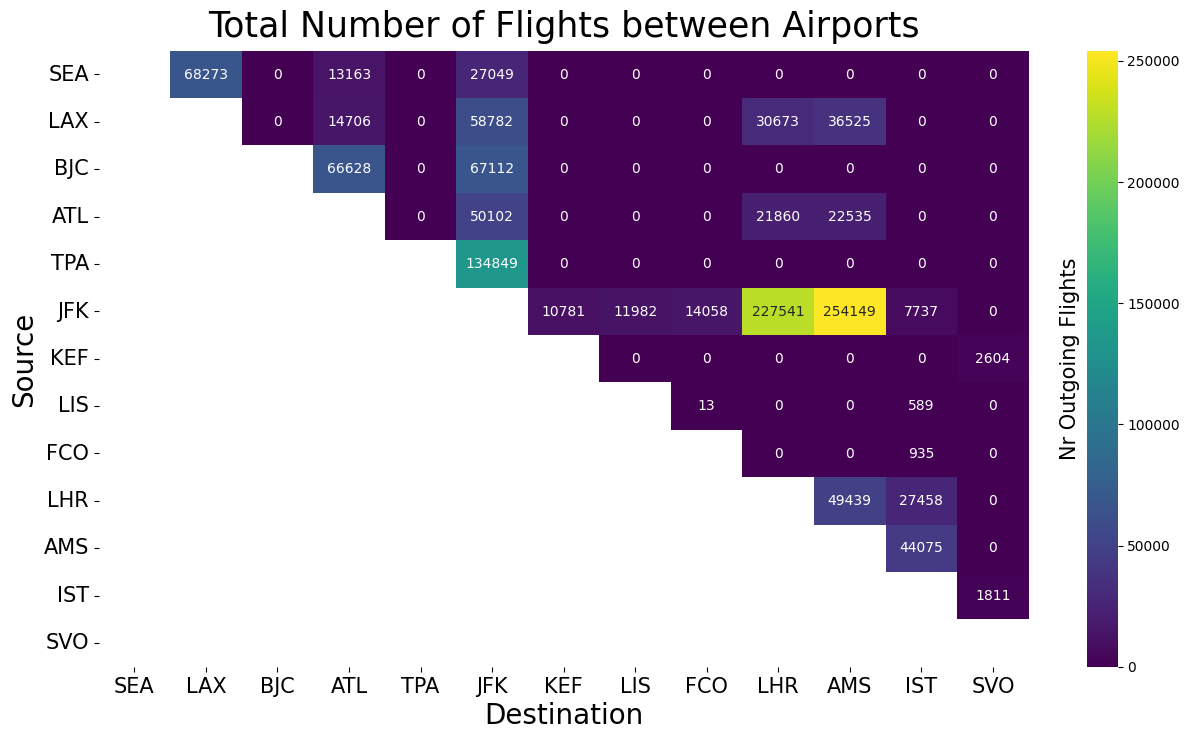

In [85]:
# Getting the Upper Triangle of the co-relation matrix
mask = np.tril(np.ones_like(edges))

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
im = sns.heatmap(edges, cmap='viridis', xticklabels=desired_order, mask=mask,
                 linecolor='k', cbar_kws={'label': 'Migration'}, ax = axes, annot=True, fmt=".0f")
cbar = im.collections[0].colorbar
cbar.set_label('Nr Outgoing Flights', size=15, labelpad=5)
cbar.ax.yaxis.set_label_position('left')
axes.set_yticks(ticks=np.arange(len(t.unique_points))+.5, labels=desired_order,
                   rotation=360)
axes.set_title('Total Number of Flights between Airports', fontsize=25, pad=10)
axes.tick_params(axis='both', labelsize=15)
axes.set_xlabel("Destination", fontsize=20)
axes.set_ylabel("Source", fontsize=20)
if not(os.path.exists('flight_matrix_NEW.pdf')):
    plt.savefig('flight_matrix_NEW.pdf', bbox_inches='tight')
plt.show()

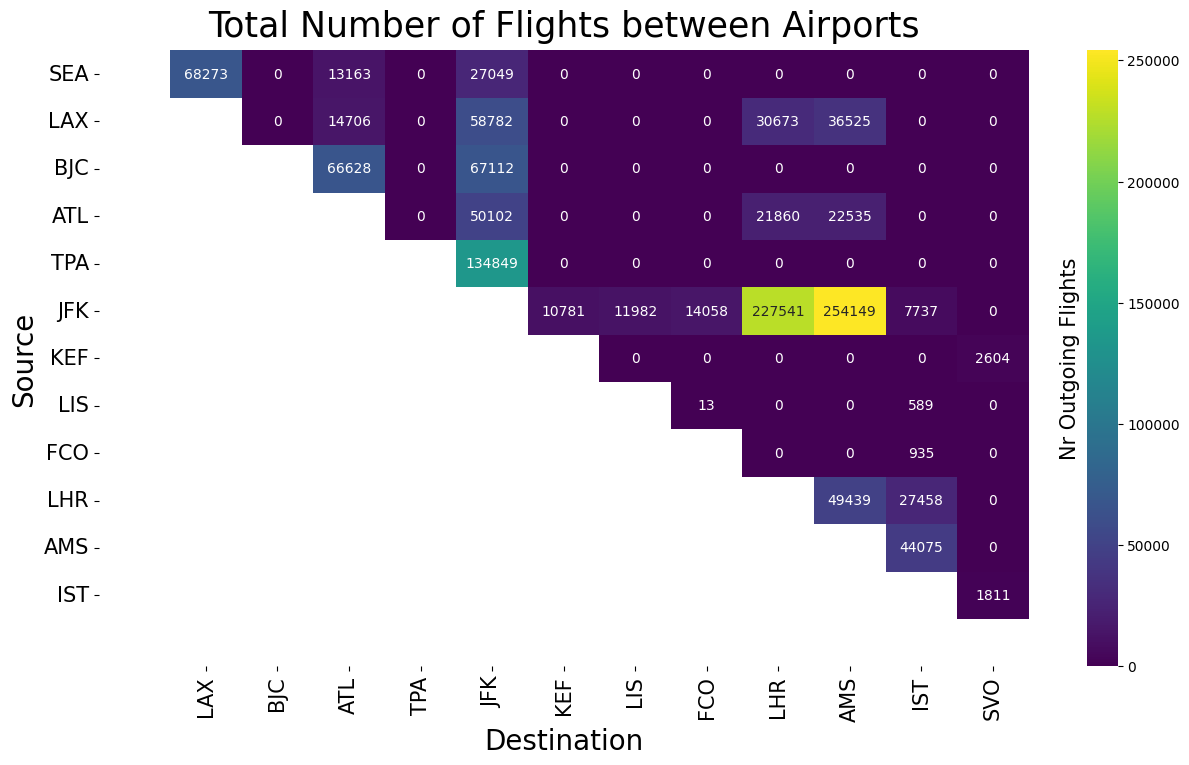

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Masking the lower triangle of the matrix
mask = np.tril(np.ones_like(edges))

fig, axes = plt.subplots(1, 1, figsize=(15, 8))
im = sns.heatmap(edges.to_numpy(), cmap='viridis', xticklabels=desired_order, mask=mask,
                 linecolor='k', cbar_kws={'label': 'Migration'}, ax=axes, annot=True, fmt=".0f")
cbar = im.collections[0].colorbar
cbar.set_label('Nr Outgoing Flights', size=15, labelpad=5)
cbar.ax.yaxis.set_label_position('left')

# Set x-ticks and y-ticks while excluding the first x-tick and the last y-tick
axes.set_xticks(ticks=np.arange(1, len(desired_order)) + 0.5, labels=desired_order[1:], rotation=90)
axes.set_yticks(ticks=np.arange(len(desired_order) - 1) + 0.5, labels=desired_order[:-1], rotation=360)

axes.set_title('Total Number of Flights between Airports', fontsize=25, pad=10)
axes.tick_params(axis='both', labelsize=15)
axes.set_xlabel("Destination", fontsize=20)
axes.set_ylabel("Source", fontsize=20)

if not os.path.exists('flight_matrix_NEW.pdf'):
    plt.savefig('flight_matrix_NEW.pdf', bbox_inches='tight')
plt.show()


In [87]:
edges

,SEA,LAX,BJC,ATL,TPA,JFK,KEF,LIS,FCO,LHR,AMS,IST,SVO
SEA,0.0,68273.0,0.0,13163.0,0.0,27049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LAX,0.0,0.0,0.0,14706.0,0.0,58782.0,0.0,0.0,0.0,30673.0,36525.0,0.0,0.0
BJC,0.0,0.0,0.0,66628.0,0.0,67112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATL,0.0,0.0,0.0,0.0,0.0,50102.0,0.0,0.0,0.0,21860.0,22535.0,0.0,0.0
TPA,0.0,0.0,0.0,0.0,0.0,134849.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JFK,0.0,0.0,0.0,0.0,0.0,0.0,10781.0,11982.0,14058.0,227541.0,254149.0,7737.0,0.0
KEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2604.0
LIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,589.0,0.0
FCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,935.0,0.0
LHR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79140.0,0.0,49439.0,27458.0,0.0
